# Introduction au Deep Learning avec Keras

In [ ]:
# ---------------------------------------- Module 1 : Exploration de données




In [ ]:
# ------------------------------ Module 2 : Premier essai avec un Random Forest


# ------------------------------------------------------------------------------

%matplotlib inline
import numpy as np # Pour la manipulation de tableaux

import matplotlib.pyplot as plt  # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur

from sklearn.model_selection import train_test_split # Pour répartir les données
from sklearn.model_selection import GridSearchCV, cross_val_score # Pour évaluer un modèle
from sklearn import metrics 

from keras.datasets.mnist import load_data # Pour charger le dataset MNIST
from sklearn.ensemble import RandomForestClassifier # Pour instancier et entraîner un modèle Random Forest

import itertools # Pour créer des iterateurs



# ------------------------------------------------------------------------------
# Pour importer le datasets mnist de Keras
from keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changer la forme de X_train et X_test
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)



#modèle de classification Random Forest
# ------------------------------------------------------------------------------

# Instanciation d'un modele Random Forest
model = RandomForestClassifier(n_jobs=-1)

# Entraînement du modèle
model.fit(X_train, y_train);



#prediction + accuracy
# ------------------------------------------------------------------------------

# Prédiction sur l'échantillon de test
test_pred = model.predict(X_test)

# On évalue le niveau de précision de notre prédiction.
print("Précision de la prédiction:", metrics.accuracy_score(y_test, test_pred)*100, '%')
# Il devrait être aux alentours de 95%.



#classification_report
# ------------------------------------------------------------------------------

print("Evaluation détaillée de la Classification par RDF :\n \n" ,
      (metrics.classification_report(y_test, test_pred)))

# On observe que les chiffres 0, 1 et 6 ont le meilleur rappel (recall), tandis que le chiffre 1 a la meilleure précision.
# Le F1-score, qui calcule la moyenne harmonique de la précision et du rappel, est un bon indicateur lorsqu'on cherche à prendre
# en compte ces deux mesures.



#matrice de confusion
# ------------------------------------------------------------------------------

#Réponse valable:
cnf_matrix = metrics.confusion_matrix(y_test, test_pred)
print(cnf_matrix)

###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
classes = range(0,10)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

#####

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    if(cnf_matrix[i,j] >15 and i!=j):
        print("Le chiffre {0} a souvent été pris pour le chiffre {1}".format(i,j))

        
        
# Afficher aléatoirement 6 images de l'échantillon X_test
# ------------------------------------------------------------------------------

j = 1

for i in np.random.choice(np.arange(0, len(y_test)), size=6):
    img = X_test[i] 
    
    # Redimensionnement de l'image
    img = img.reshape(28, 28)
    
    # Sélection de la sous-figure
    plt.subplot(2, 3, j)
    j = j + 1
    
    # Suppression des axes
    plt.axis('off')
    
    # Affichage de l'image en niveaux de gris
    plt.imshow(img, cmap = cm.binary)
    plt.title('Prediction: ' + str(test_pred[i]))
    
# ------------------------------------------

# ------------------------------------------

In [ ]:
# ------------------------------ Module 4 : Prédiction à l'aide des Dense Neural Networks




# ------------------------------------------------------------------------------
import numpy as np # Pour la manipulation de tableaux

import pandas as pd # Pour manipuler des DataFrames pandas

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

from keras.models import Sequential # Pour construire un réseau de neurones
from keras.layers import Dense # Pour instancier une couche dense
from keras.utils import np_utils

import itertools # Pour créer des iterateurs

from sklearn import metrics # Pour évaluer les modèles



# charger les échantillons d'entraînement
# ------------------------------------------------------------------------------
# Pour importer le datasets mnist de Keras
from keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changement de forme
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:', y_train.shape)




# min max scaler
# ------------------------------------------------------------------------------
X_train = X_train / 255
X_test = X_test / 255




# fonction similaire a reshape 
# ------------------------------------------------------------------------------
y_train = np_utils.to_categorical(y_train, dtype = 'int') # Veiller à n'exécuter cette instruction qu'une seule fois
y_test = np_utils.to_categorical(y_test, dtype = 'int')   # Veiller à n'exécuter cette instruction qu'une seule fois

# La méthode *np_utils.to_categorical* transforme les chiffres en vecteurs
# remplis de zéros, sauf à la position du chiffre en question qui vaut 1 
# Par exemple, 3 devient (0,0,0,1,0,0,0,0,0,0)

# Ainsi y_train et y_test deviennent des matrices de mêmes nombres de lignes mais avec autant
# de colonnes que de classes (chiffres uniques) qu'elles possèdent.

num_pixels = X_train.shape[1]
num_classes = y_test.shape[1]




# modele + couche de neurone 
# ------------------------------------------------------------------------------
# Instanciation du modèle
model = Sequential()

# Instanciation de la première couche dense
first_layer = Dense(units = 20,                     # nombre de neurones
                    input_dim = num_pixels,         # dimension du vecteur d'entrée
                    kernel_initializer ='normal',   # loi d'initialisation du vecteur de poids
                    activation ='tanh')             # fonction d'activation

# Instanciation de la seconde couche dense
second_layer = Dense(units = num_classes,
                     kernel_initializer ='normal',
                     activation ='softmax')

# Ajout des couches aux modèle
model.add(first_layer)
model.add(second_layer)



#compile le modele
# ------------------------------------------------------------------------------
model.compile(loss = 'categorical_crossentropy',  # fonction de perte
              optimizer = 'adam',                 # algorithme d'optimisation
              metrics = ['accuracy'])             # métrique d'évaluation


# entrainement
# ------------------------------------------------------------------------------

training_history = model.fit(X_train, y_train,          # données d'entraînement
                             epochs = 20,               # nombre d'epochs
                             batch_size = 200,          # taille des batchs
                             validation_split = 0.2)    # proportion de l'échantillon de validation


# history (indice de pertinence et de precision )
# ------------------------------------------------------------------------------
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']



# tracez les courbes d history
# ------------------------------------------------------------------------------
# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe de la précision sur l'échantillon d'entrainement
plt.plot(np.arange(1 , 21, 1),
         training_history.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')

# Courbe de la précision sur l'échantillon de validation
plt.plot(np.arange(1 , 21, 1),
         training_history.history['val_accuracy'], 
         label = 'Validation Accuracy',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()




# prediction + score
# ------------------------------------------------------------------------------
# Prediction de l'échantillon de test
test_pred = model.predict(X_test)

# Evaluation du modèle
score = model.evaluate(X_test, y_test)
score



#classification_report
#crosstab
# ------------------------------------------------------------------------------
test_pred = model.predict(X_test)

test_pred_class = test_pred.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)

print(metrics.classification_report(y_test_class, test_pred_class))
pd.crosstab(y_test_class, test_pred_class)




# la matrice de confusion entre y_test_class et test_pred_class
# ------------------------------------------------------------------------------
#Réponse valable:
cnf_matrix = metrics.confusion_matrix(y_test_class, test_pred_class)
print(cnf_matrix)

###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
classes = range(0,10)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()


# Module 5 : Types de Couches
------------------------------ 



### Les couches Dense
------------------------------------------------------------------------------


Les couches Dense ou Fully-connected correspondent aux couches que nous trouvons dans le modèle MLP vu dans le module théorique précédent.

Chaque neurone de cette couche possède un vecteur de poids de la même taille que le vecteur qui lui est passé en entrée et un terme de biais.

Les opérations effectuées par cette couche sont:

  - Produit scalaire entre les vecteur de poids de chaque neurone et le vecteur d'entrée auquel on ajoute un terme de biais spécifique à chaque neurone.
  - Activation des résultats des produits scalaires grâce par une fonction d'activation non-linéaire telle que  ReLUReLU ,  tanhtanh  ou  sigmoidsigmoid .
  - Concaténation des activations pour former un nouveau vecteur qui sera passé en entrée de la couche suivante.


La couche d'entrée contient 5 neurones, donc la taille du vecteur d'entrée et du vecteur de poids de chaque neurones de la couche dense suivante sera de 5.
La première couche dense contient 3 neurones, donc la taille de son vecteur de sortie sera de 3 et la taille du vecteur de poids de chaque neurone de la couche dense suivante sera de 3.
La deuxième couche dense contient 4 neurones, donc la taille de son vecteur de sortie sera de 4.



### Les couches de Convolution
------------------------------------------------------------------------------

Le produit de convolution est une opération qui ressemble beaucoup au produit scalaire, sauf qu'il ne s'effectue pas sur un vecteur mais sur une matrice:

D'un côté nous avons une matrice d'entrée, souvent appelée tuile ou convolution patch en anglais, et d'un autre nous avons une matrice de convolution, souvent appelée noyau de convolution, filtre ou convolution kernel en anglais.

Ces deux matrices doivent absolument avoir les mêmes dimensions pour calculer leur produit de convolution.

Les étapes du produit de convolution sont les mêmes que celles du produit scalaire:

 - Produit terme à terme des deux matrices.
 - Somme des produits.
 
Dans l'animation interactive suivante, nous illustrons le produit de convolution entre une tuile et un noyau de convolution de dimensions  3 x 3 .



### Couches de Régularisation
------------------------------------------------------------------------------

Les réseaux de neurones contiennent énormément de paramètres, en particulier les couches denses. C'est pour cette raison qu'ils sont très susceptibles au surapprentissage, c'est-à-dire qu'ils auront une très bonne performance sur l'échantillon d'entraînement, mais cette performance ne pourra pas se généraliser sur l'échantillon de test.

De plus, dans certains problèmes comme la classification d'images ou de sons, le nombre de variables est tellement élevé que les données se retrouvent éparpillée dans un espace de très grande dimension. Il est alors très difficile d'entraîner un modèle sur des données ayant autant de variance. Ce problème est connu comme le fléau ou la malédiction de la dimensionnalité (Curse of Dimensionality).

Pour cela il existe plusieurs techniques spécifiques au deep learning qui permettront de réduire simultanément le nombre de variables et le nombre de paramètres du modèle tout en préservant au maximum l'essentiel des caractéristiques des données et la performance du modèle.

Ces techniques s'appellent des techniques de régularisation.

Les opérations que nous verrons dans la suite sont souvent illustrées par des "couches" car elles se font sur la sortie d'une couche de neurones et le résultat sera transmis à la couche de neurones suivante.


### Couche de Max-Pooling
------------------------------------------------------------------------------

La couche de Max-Pooling s'utilise lorsque les données sur lesquelles nous travaillons sont des matrices. Le concept du max-pooling est très simple:

 - La matrice est découpée en plusieurs petites tuiles contenant des valeurs de la matrice.
 - De chaque tuile on extrait la valeur maximale.
 - On recompose une matrice ne contenant que les valeurs maximales de chaque tuile.


### Couche de Average-Pooling
------------------------------------------------------------------------------

Comme pour le max-pooling, l'Average-Pooling s'effectue sur des matrices. L'opération se déroule ainsi:

 - La matrice est découpée en plusieurs petites tuiles contenant des valeurs de la matrice.
 - De chaque tuile on extrait la moyenne.
 - On recompose une matrice ne contenant que les moyennes de chaque tuile.



### Couche de Dropout
------------------------------------------------------------------------------
La technique du Dropout (ou Abandon en français) consiste à couper certaines connections entre neurones de couches consécutives. Cette technique réduit considérablement la quantité de paramètres à entraîner et permet de "renforcer" les liens entre neurones consécutifs

La quantité de connections conservées dépend d'un paramètre p qui définit la proportions de connections à être gardées. Chaque couche de dropout d'un modèle est définie par ce paramètre.



In [ ]:
# --------------------- Module 6 : Prédiction à l'aide des Convolutional Neural Networks (CNN)




# ------------------------------------------------------------------------------
%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils 

from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import cm

import itertools


# Recupérer les données 
# ------------------------------------------------------------------------------
# Pour importer le datasets mnist de Keras
from keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changer la forme de X_train et X_test
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)


#reshape les données
# ------------------------------------------------------------------------------
X_train = X_train.reshape((-1, 28, 28, 1))

X_test = X_test.reshape((-1, 28, 28, 1))


#normalisation
# ------------------------------------------------------------------------------
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)





#Construction de l'architecture CNN
# ------------------------------------------------------------------------------
#filters : Un entier correspondant au nombre de matrice de convolution dans la couche.
#kernel_size : Un couple d'entiers correspondant aux dimensions du noyau de convolution.
#padding : détermine si le noyau a le droit de dépasser le bord de l'image.
#input_shape : n-uplet correspondant aux dimensions de l'image d'entrée. Doit absolument être précisé dans la première couche.
#data_format : détermine quelle dimension de l'input correspond à quelle dimension de l'image.
#activation : fonction d'activation qui sera appliquée à chaque case de la sortie du neurone.


model = Sequential()

first_layer = Conv2D(filters = 32,  #filters = 32 : La couche sera composée de 32 matrices de convolution
                     kernel_size = (5, 5),   #kernel_size = (5, 5) : le noyau de convolution sera de dimension 5x5 (25 neuronnes par filtre).
                     padding = 'valid',  #padding = 'valid' : pour que le noyau ne puisse pas dépasser les bords de l'image.
                     input_shape = (28, 28, 1),  #input_shape = (28, 28, 1) : l'image passé en entrée aura 28 pixels de hauteur, 28 pixels de largeur et 1 canal.
                     activation = 'relu')  #activation = 'relu'.

second_layer = MaxPooling2D(pool_size = (2, 2))  # pool_size = (2, 2) pour que le maximum soit calculé sur des morceaux de dimensions 2x2

model.add(first_layer)
model.add(second_layer)


third_layer = Dropout(rate = 0.2)  #rate = 0.2 pour couper 20% des connections entre la couche précédente et la couche suivante

fourth_layer = Flatten()  #Cette couche ne prends pas de paramètre et permet juste d'aplatir un vecteur en une matrice. 

fifth_layer = Dense(units = 128,
                    activation = 'relu')  #avec 128 neurones et la fonction d'activation ReLU.

output_layer = Dense(units = 10,
                     activation='softmax')  #10 neurones (pour 10 classes d'output) et une fonction d'activation softmax pour renvoyer des prédictions de probabilité pour chaque classe.

model.add(third_layer)
model.add(fourth_layer)
model.add(fifth_layer)
model.add(output_layer)


# Compiler le modèle
# ------------------------------------------------------------------------------
model.compile(loss='categorical_crossentropy', # fonction de perte
              optimizer='adam',                # algorithme d'optimisation
              metrics=['accuracy'])            # métrique d'évaluation


# Entraîner le modèle avec les données d'entraînement
# ------------------------------------------------------------------------------
training_history = model.fit(X_train, y_train,
                             validation_split = 0.2,
                             epochs = 10,
                             batch_size = 200)



#stocker les précisions d'entraînement et de validation 
# ------------------------------------------------------------------------------
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']



#courbe 
# ------------------------------------------------------------------------------
# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe de la précision sur l'échantillon d'entrainement
plt.plot(np.arange(1 , 11, 1),
         training_history.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')

# Courbe de la précision sur l'échantillon de validation
plt.plot(np.arange(1 , 11, 1),
         training_history.history['val_accuracy'], 
         label = 'Validation Accuracy',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()


#classification_report
# ------------------------------------------------------------------------------
test_pred = model.predict(X_test)

test_pred_class = test_pred.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)

print(metrics.classification_report(y_test_class, test_pred_class))



#confusion_matrix
# ------------------------------------------------------------------------------
#Réponse valable:
cnf_matrix = metrics.confusion_matrix(y_test_class, test_pred_class)
print(cnf_matrix)

###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
classes = range(0,10)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()



#afficher des images sur lesquelles le modèle s'est trompé
# ------------------------------------------------------------------------------
error_indexes = []
for i in range(len(test_pred)):
    if (test_pred_class[i] != y_test_class[i]):
        if(y_test_class[i] == 5 or y_test_class[i] == 3):
            if(test_pred_class[i] == 5 or test_pred_class[i] == 3):
                error_indexes += [i]

j = 1
for i in np.random.choice(error_indexes, size = 3):
    img = X_test[i] 
    img = img.reshape(28, 28)
    
    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img, cmap=cm.binary, interpolation='None')
    plt.title('True Label: ' + str(y_test_class[i]) \
              + '\n' + 'Prediction: '+ str(test_pred_class[i]) \
              + '\n' + 'Confidence: '+ str(round(test_pred[i][test_pred_class[i]], 2)))
    


In [ ]:
# --------------------- Module 7 : Résolution avec l'architecture LeNet




# ------------------------------------------------------------------------------
%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics

import itertools



# charger les données
# ------------------------------------------------------------------------------
# Pour importer le datasets mnist de Keras
from keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changer la forme de X_train et X_test
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)



# reshape
# ------------------------------------------------------------------------------
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))




# normalisation
# ------------------------------------------------------------------------------
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)



# L'architecture du LeNet
# ------------------------------------------------------------------------------
#Convolution 1 : 30 filtres, dimension d'entrée (28, 28, 1), dimension du noyau (5, 5), fonction d'activation ReLU, pas de dépassement du noyau.
#Max-Pooling 1 : dimension du pooling (2, 2).
#Convolution 2 : 16 filtres, dimension du noyau (3, 3), fonction d'activation ReLU, Pas de dépassement du noyau.
#Max-Pooling 2 : dimension du pooling (2, 2).
#Dropout : Connexions coupées: 20%.
#Aplatissement
#Dense 1 : 128 neurones, fonction d'activation ReLU.
#Dense 2 : 10 neurones, fonction d'activation softmax.

# Architecture du modèle
lenet = Sequential()

conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 1),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = 0.2)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 10,
                activation = 'softmax')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)

lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

# Entraînement_1
training_history_lenet = lenet.fit(X_train, y_train,          # données
                                   validation_split = 0.2,    # split de validation
                                   epochs = 16,               # nombre d'epochs
                                   batch_size = 200)          # taille des batchs



#précisions & validation obtenues 
# ------------------------------------------------------------------------------
train_acc_lenet = training_history_lenet.history['accuracy']
val_acc_lenet = training_history_lenet.history['val_accuracy']



#comparer les trois réseaux : le réseau dense, le CNN et LeNet
# ------------------------------------------------------------------------------
# Réseau Dense

dense = Sequential()
dense_0 = Flatten()
dense_1 = Dense(units = 20, input_dim = 784, kernel_initializer ='normal', activation ='tanh')            
dense_2 = Dense(units = 10, kernel_initializer ='normal', activation ='softmax')
dense.add(dense_0)
dense.add(dense_1)
dense.add(dense_2)

# CNN

cnn = Sequential()
cnn_1 = Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', input_shape = (28, 28, 1), activation = 'relu')
cnn_2 = MaxPooling2D(pool_size = (2, 2))
cnn_3 = Dropout(rate = 0.2)
cnn_4 = Flatten()
cnn_5 = Dense(units = 128, activation = 'relu')
cnn_6 = Dense(units = 10, activation='softmax')

cnn.add(cnn_1)
cnn.add(cnn_2)
cnn.add(cnn_3)
cnn.add(cnn_4)
cnn.add(cnn_5)
cnn.add(cnn_6)

# Compilation
dense.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])           
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])            

# Entraînement
training_history_dense = dense.fit(X_train, y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)
training_history_cnn = cnn.fit(X_train, y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)



# efficacite comparaison
# ------------------------------------------------------------------------------
val_acc_dense = training_history_dense.history['val_accuracy']
val_acc_cnn = training_history_cnn.history['val_accuracy']

# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe du score de validation du réseau Dense
plt.plot(np.arange(1 , 17, 1),
         val_acc_dense,
         label = 'Dense',
         color = 'blue')

# Courbe du score de validation du réseau CNN
plt.plot(np.arange(1 , 17, 1),
         val_acc_cnn, 
         label = 'CNN',
         color = 'red')

# Courbe du score de validation du réseau LeNet
plt.plot(np.arange(1 , 17, 1),
         val_acc_lenet, 
         label = 'LeNet',
         color = 'green')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()



# predict
# ------------------------------------------------------------------------------
test_pred_lenet = lenet.predict(X_test)
test_pred_dense = dense.predict(X_test)
test_pred_cnn = cnn.predict(X_test)



#  obtenir des vecteurs d'entiers correspondant aux classes prédites et réelles
# ------------------------------------------------------------------------------
test_pred_lenet_class = test_pred_lenet.argmax(axis = 1)
test_pred_dense_class = test_pred_dense.argmax(axis = 1)
test_pred_cnn_class = test_pred_cnn.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)



#classification report 
# ------------------------------------------------------------------------------
print(metrics.classification_report(y_test_class, test_pred_lenet_class))



# voir les images de la base de test où les trois modèles se sont trompés
# ------------------------------------------------------------------------------
error_indexes = []
for i in range(len(test_pred_cnn)):
    if (test_pred_lenet_class[i] != y_test_class[i]):
        if(test_pred_dense_class[i] != y_test_class[i]):
            if(test_pred_cnn_class[i] != y_test_class[i]):
                error_indexes += [i]

j = 1
for i in np.random.choice(error_indexes, size = 3):
    img = X_test[i] 
    img = img.reshape(28, 28)
    
    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img,cmap = cm.binary, interpolation='None')
    plt.title('True Label: ' + str(y_test_class[i]) \
              + '\n' + 'Prediction: '+ str(test_pred_lenet_class[i]) \
              + '\n' + 'Confidence: '+ str(round(test_pred_lenet[i][test_pred_lenet_class[i]], 2)))


#conclusion
# ------------------------------------------------------------------------------
#  Le schéma pour implémenter un modèle avec keras est très simple:

#  Architecture du modèle
#  Compilation du modèle
#  Entraînement du modèle
#  Diagnostique de l'entraînement
#  Evaluation des prédictions


In [ ]:
# --------------------- Module 8 : Transfer Learning





# ------------------------------------------------------------------------------
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import time, cv2
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K



# Exploration des données
# ------------------------------------------------------------------------------
artists = pd.read_csv("artists.csv", index_col=0)
artists.head()



# manip : nombre de peintres en fonction de leur nationnalité 
# ------------------------------------------------------------------------------

artists['nationality'].value_counts()
plt.figure (figsize = (20,6))
artists['nationality'].hist(bins = len (artists['nationality']), xlabelsize=6)



# manip : nombre de tableau en fonction de la nationalité des peintres
# ------------------------------------------------------------------------------
import pandas as pd
tab_nation = artists.groupby ( 'nationality').sum()

tab_nation.plot(kind = 'bar')




# Afficher le nombre de tableau en fonction du peintre
# ------------------------------------------------------------------------------
df['artists'].value_counts().plot(kind = 'bar', figsize = (16,6))




#train et test
# ------------------------------------------------------------------------------
n_class = 10

# data ne prenant que les 10 premières classes
x = list (df['class'].unique()[:10]  )
data = df[df['class'].isin (x)]

# ensemble d'entraînement data_train et en un ensemble de test data_test. Nous choisirons un rapport de 80%
len (data) * 0.8

data_train = data[:1182]
data_test  = data[1182:]



#Transfer Learning
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------



# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------


# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------


L'exercice est composé de plusieurs questions, faites-les dans l'ordre et faites attention à respecter le nom des variables. N'hésitez pas à contacter l'équipe DataScientest si vous rencontrez des problèmes sur help@datascientest.com.

L'objet de cet exercice consiste à créer un modèle de reconnaissance d'image capable de prédire s'il y a un père noël sur l'image. Le modèle devra être le plus précis en ≠ en suivant une méthode qui minimise la taille des données pour un maximum de précision.

Générateur d'images
Avant d'utiliser les images d'une base de données, il faut souvent traiter en amont les images. En deep learning, le réseau de neurones doit s'entraîner sur des lots d'images de la base de données. La classe ImageDataGenerator permet de générer des lots d'images transformées pour entraîner votre réseau. Dans ce test vous devrez vous appuyer sur la documentation cliquez ici.

Importer ImageDataGenerator du sous-module keras.preprocessing.image.
Créer train_datagen une instance de ImageDataGenerator avec pour paramètres :

rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
Créer test_datagen, une instace de ImageDataGenerator avec comme unique paramètre rescale = 1./255.

In [1]:
# Insérer votre code ici

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator (rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
fill_mode='nearest' )

test_datagen= ImageDataGenerator (rescale = 1./255)

Base de données et importation des données
Deux dossiers s'intitulant images et images_test contiennent chacun deux sous-dossiers d'images. santa qui ne contient que des images de père Noël, et not_santa et l'autre d'images aléatoire d'objets et de personnes qui ne sont pas des pères Noël.

Pour importer et transformer les images avec la classe ImageDataGenerator, on utilise la méthode flow_from_directory qui prend en argument le chemin donnant accès aux dossiers. Elle détecte automatiquement les images et les classes dans deux catégories différentes car les images sont dans deux dossiers différents.

Pour plus d'information sur flow_from_directory cliquez-ici

Pour importer vos images lancer le code suivant.

In [2]:
# Lancer le code suivant

# On prend des lots de 32

training_set = train_datagen.flow_from_directory('images',
target_size = (64, 64), batch_size = 32, class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('images_test', 
target_size = (64, 64),
batch_size = 32,
class_mode = 'categorical')

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'images'

Affichage de la donnée "Augmentée"
Observons le resultat d'une augmentation de données

Exécuter la cellule suivante pour observer des données augmentées

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


training_set      = train_datagen.flow_from_directory('images', target_size = (64, 64), batch_size = 32, class_mode = 'categorical')
batches_augmented = train_datagen.flow_from_directory('images', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)

batches_real = test_datagen.flow_from_directory('images', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)

x_batch_augmented, y_batch_augmented = next(batches_augmented)   # separation target feature
x_batch_real, y_batch_real = next(batches_real)                  # separation target feature 

for i in range(16):     #boucle 
    image_augmented = x_batch_augmented[i]   
    image_real = x_batch_real[i]              
     
    title_add_on = "random image"
    if y_batch_augmented[i][1]: title_add_on =  "santa"

    plt.subplot(221)
    plt.imshow(image_real)
    plt.title("original " + title_add_on)

        
    plt.subplot(222)
    plt.imshow(image_augmented)
    plt.title("augmented " + title_add_on)

    plt.show()

Quels sont les transformations apportées sur la donnée augmentée ?
Selon vous, en quoi l'augmentation de données est-elle utile pour l'entrainement d'un réseau de neuronnes ?

In [ ]:
(rescale = 1./255, #dimensionnement
shear_range  :   # Rogner
zoom_range  : # Plage de zoom 
rotation_range :   #rotation_range: Plage de degrés pour la rotation aléatoire de l'image
width_shift_range : # plage pour la translation horizontale de l'image
height_shift_range : #plage pour la translation verticale de l'image
horizontal_flip :  #si True retourne aléatoirement ( p=12p=12 ) l'image horizontalement.
fill_mode : #mode de remplissage 
 
 
 pour eviter l overfitting 

Création du réseau de neurones
Pour classer ces images, vous pouvez vous appuyer sur le réseau de neurones suivant :


La sortie de la méthode .summary() de votre modèle devra ressembler à ceci :


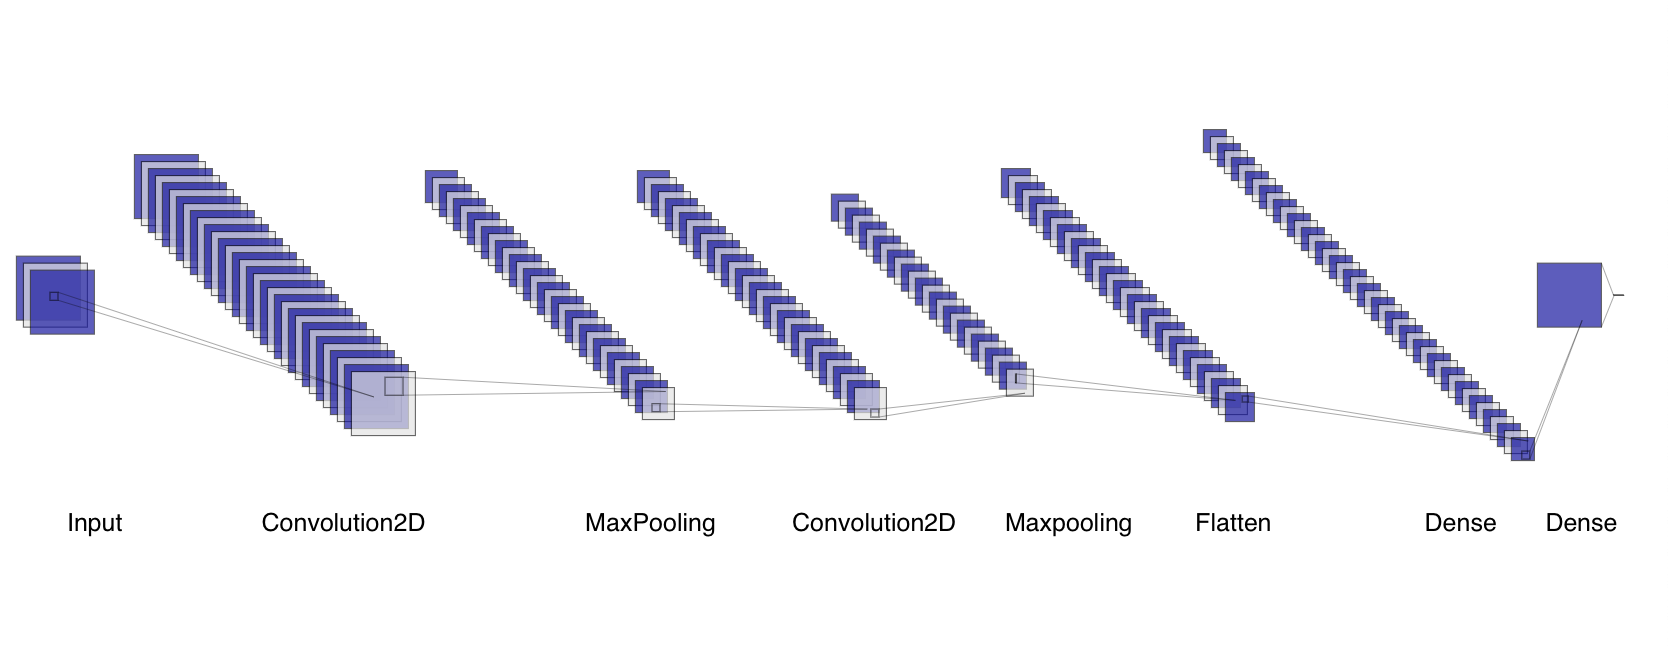
                        _________________________________________________________________
                        Layer (type)                 Output Shape              Param #   
                        =================================================================
                        conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
                        _________________________________________________________________
                        max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
                        _________________________________________________________________
                        conv2d_6 (Conv2D)            (None, 29, 29, 32)        9248      
                        _________________________________________________________________
                        max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
                        _________________________________________________________________
                        flatten_3 (Flatten)          (None, 6272)              0         
                        _________________________________________________________________
                        dense_5 (Dense)              (None, 128)               802944    
                        _________________________________________________________________
                        dense_6 (Dense)              (None, 2)                 258       
                        =================================================================
                        Total params: 813,346
                        Trainable params: 813,346
                        Non-trainable params: 0
                        _________________________________________________________________
   

Implémenter votre modèle dans une instance nommée classifier.
Entrainer votre modèle jusqu'à atteindre une précision de validation val_accuracy supérieure à 0.85, en choisissant judicieusement les paramètres d'entrainement.
NB : training_set est un générateur, il faut utiliser la méthode fit_generator là où vous avez l'habitude d'utiliser la méthode fit.

In [ ]:
%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics

import itertools

from keras import backend
backend.set_image_data_format('channels_last')




classifier = Sequential()

conv2d_5 = Conv2D(filters = 32,                     # Nombre de filtres
                kernel_size = (3, 3),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape =  (64, 64, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation
#param = 32*(3*(3*3)+1) = 896

#max_pooling2d_5 = MaxPooling2D(pool_size = ( 31, 32) )

max_pooling2d_5 = MaxPooling2D(pool_size = (2, 2) )

conv2d_6 = Conv2D(   filters = 32,                 
                kernel_size = (3, 3),          
                padding = 'valid',
                #input_shape =  ( 29, 29, 32),   
                activation = 'relu')
#param = 32*(32*(3*3)+1) = 9248

#max_pooling2d_6 = MaxPooling2D(pool_size = (1, 1), input_shape=(14,  32),)
max_pooling2d_6 = MaxPooling2D(pool_size = (2, 2))

flatten_3 = Flatten()

dense_5 = Dense(units = 128, activation = 'relu')

dense_6 = Dense(units = 2, activation = 'Softmax')

classifier.add(conv2d_5)
classifier.add(max_pooling2d_5)
classifier.add(conv2d_6)
classifier.add(max_pooling2d_6)
classifier.add(flatten_3)
classifier.add(dense_5)
classifier.add(dense_6)





In [ ]:

classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  



In [ ]:
hist = classifier.fit_generator(training_set,validation_data = test_set, epochs = 10, steps_per_epoch = len(training_set))

In [ ]:
hist.history['val_accuracy']

Test du modèle
Exécuter le code suivant pour obsever la probabilité que l'on obtient pour une image de Thor.

Réitérer le test avec les photos suivantes:

chien.jpg

chat.jpg

selfie.jpg

santa_rock.jpeg

In [ ]:
# Insérer votre code ici
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

txt ='chien.jpg' # Préciser le chemin local
test_image = image.load_img(txt, target_size = (64, 64))
test_image = image.img_to_array(test_image)/255
test_image = np.expand_dims(test_image, axis = 0)

proba = round(100*classifier.predict_proba(test_image)[0][1], 2)
if proba < 50:
    santa_or_not = 'Not Santa'
    proba = round(100-proba, 2)
else:
    santa_or_not = 'Santa'
img = mpimg.imread(txt)
plt.axis('off')
plt.text(-10, -15, santa_or_not+': '+str(proba)+'%', color = (1, 0, 0), fontsize = 20, fontweight = 'extra bold')
imgplot = plt.imshow(img)


Pour approfondir sur l'augmentation de données consultez cet article du blog keras.

In [ ]:
# Insérer votre code ici
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

txt ='chat.jpg' # Préciser le chemin local
test_image = image.load_img(txt, target_size = (64, 64))
test_image = image.img_to_array(test_image)/255
test_image = np.expand_dims(test_image, axis = 0)

proba = round(100*classifier.predict_proba(test_image)[0][1], 2)
if proba < 50:
    santa_or_not = 'Not Santa'
    proba = round(100-proba, 2)
else:
    santa_or_not = 'Santa'
img = mpimg.imread(txt)
plt.axis('off')
plt.text(-10, -15, santa_or_not+': '+str(proba)+'%', color = (1, 0, 0), fontsize = 20, fontweight = 'extra bold')
imgplot = plt.imshow(img)


In [ ]:
# Insérer votre code ici



from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

txt ='selfie.jpg' # Préciser le chemin local
test_image = image.load_img(txt, target_size = (64, 64))
test_image = image.img_to_array(test_image)/255
test_image = np.expand_dims(test_image, axis = 0)

proba = round(100*classifier.predict_proba(test_image)[0][1], 2)
if proba < 50:
    santa_or_not = 'Not Santa'
    proba = round(100-proba, 2)
else:
    santa_or_not = 'Santa'
img = mpimg.imread(txt)
plt.axis('off')
plt.text(-10, -15, santa_or_not+': '+str(proba)+'%', color = (1, 0, 0), fontsize = 20, fontweight = 'extra bold')
imgplot = plt.imshow(img)


In [ ]:
# Insérer votre code ici
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

txt ='santa_rock.jpeg' # Préciser le chemin local
test_image = image.load_img(txt, target_size = (64, 64))
test_image = image.img_to_array(test_image)/255
test_image = np.expand_dims(test_image, axis = 0)

proba = round(100*classifier.predict_proba(test_image)[0][1], 2)
if proba < 50:
    santa_or_not = 'Not Santa'
    proba = round(100-proba, 2)
else:
    santa_or_not = 'Santa'
img = mpimg.imread(txt)
plt.axis('off')
plt.text(-10, -15, santa_or_not+': '+str(proba)+'%', color = (1, 0, 0), fontsize = 20, fontweight = 'extra bold')
imgplot = plt.imshow(img)


In [ ]:
%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics

import itertools

from keras import backend
backend.set_image_data_format('channels_last')




classifier = Sequential()

conv2d_5 = Conv2D(filters = 32,                     # Nombre de filtres
                kernel_size = (3, 3),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape =  (64, 64, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation
#param = 32*(3*(3*3)+1) = 896

#max_pooling2d_5 = MaxPooling2D(pool_size = ( 31, 32) )

max_pooling2d_5 = MaxPooling2D(pool_size = (2, 2) )

conv2d_6 = Conv2D(   filters = 32,                 
                kernel_size = (3, 3),          
                padding = 'valid',
                #input_shape =  ( 29, 29, 32),   
                activation = 'relu')
#param = 32*(32*(3*3)+1) = 9248

#max_pooling2d_6 = MaxPooling2D(pool_size = (1, 1), input_shape=(14,  32),)
max_pooling2d_6 = MaxPooling2D(pool_size = (2, 2))

flatten_3 = Flatten()

dense_5 = Dense(units = 128, activation = 'relu')

dense_6 = Dense(units = 2, activation = 'softmax')

classifier.add(conv2d_5)
classifier.add(max_pooling2d_5)
classifier.add(conv2d_6)
classifier.add(max_pooling2d_6)
classifier.add(flatten_3)
classifier.add(dense_5)
classifier.add(dense_6)
%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics

import itertools

from keras import backend
backend.set_image_data_format('channels_last')




classifier = Sequential()

conv2d_5 = Conv2D(filters = 32,                     # Nombre de filtres
                kernel_size = (3, 3),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape =  (64, 64, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation
#param = 32*(3*(3*3)+1) = 896

#max_pooling2d_5 = MaxPooling2D(pool_size = ( 31, 32) )

max_pooling2d_5 = MaxPooling2D(pool_size = (2, 2) )

conv2d_6 = Conv2D(   filters = 32,                 
                kernel_size = (3, 3),          
                padding = 'valid',
                #input_shape =  ( 29, 29, 32),   
                activation = 'relu')
#param = 32*(32*(3*3)+1) = 9248

#max_pooling2d_6 = MaxPooling2D(pool_size = (1, 1), input_shape=(14,  32),)
max_pooling2d_6 = MaxPooling2D(pool_size = (2, 2))

flatten_3 = Flatten()

dense_5 = Dense(units = 128, activation = 'relu')

dense_6 = Dense(units = 2, activation = 'softmax')

classifier.add(conv2d_5)
classifier.add(max_pooling2d_5)
classifier.add(conv2d_6)
classifier.add(max_pooling2d_6)
classifier.add(flatten_3)
classifier.add(dense_5)
classifier.add(dense_6)

classifier.summary()


In [ ]:
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  



In [ ]:
epoch =10
hist = classifier.fit_generator(training_set,validation_data = test_set, epochs = epoch, steps_per_epoch = len(training_set))

In [ ]:


val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']


plt.figure ( figsize = (16,6))

# Courbe du score de validation 
plt.plot(np.arange(1 , epoch +1, 1),
         val_acc,
         label = 'val_acc',
         color = 'blue')


# Courbe acc
plt.plot(np.arange(1 , epoch +1, 1),
         acc,
         label = 'acc',
         color = 'red')

# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

In [ ]:
(rescale = 1./255, #dimensionnement
shear_range  :   # Rogner
zoom_range  : # Plage de zoom 
rotation_range :   #rotation_range: Plage de degrés pour la rotation aléatoire de l'image
width_shift_range : # plage pour la translation horizontale de l'image
height_shift_range : #plage pour la translation verticale de l'image
horizontal_flip :  #si True retourne aléatoirement ( p=12p=12 ) l'image horizontalement.
fill_mode : #mode de remplissage 
 
 
 pour eviter l overfitting 